# Lab 0.1: Data Exploration

## Step 1: Raw Data Loading & Cleaning

In [40]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

# Import Data
inbound_df = pd.read_csv("./data/Inbound.csv")
inventory_df = pd.read_csv("./data/Inventory.csv")
material_master_df = pd.read_csv("./data/MaterialMaster.csv")
operation_cost_df = pd.read_csv("./data/OperationCost.csv")
outbound_df = pd.read_csv("./data/Outbound.csv")

inbound_df.rename(columns={'INBOUND_DATE': 'DATE'}, inplace=True)
outbound_df.rename(columns={'OUTBOUND_DATE': 'DATE'}, inplace=True)
inventory_df['DATE'] = pd.to_datetime(inventory_df['BALANCE_AS_OF_DATE'], format='%m/%d/%Y')
# inventory_df.rename(columns={'BALANCE_AS_OF_DATE': 'DATE'}, inplace=True)


#### Data Cleaning

In [41]:
# Deleting null values
print("Inbound :\n", inbound_df.isnull().sum())
print("\nInventory :\n", inventory_df.isnull().sum())
print("\nMaterials :\n", material_master_df.isnull().sum())
print("\nOperation Costs :\n", operation_cost_df.isnull().sum())
print("\nOutbound :\n", outbound_df.isnull().sum())
inventory_df = inventory_df.dropna()
outbound_df = outbound_df.dropna()

Inbound :
 DATE               0
PLANT_NAME         0
MATERIAL_NAME      0
NET_QUANTITY_MT    0
dtype: int64

Inventory :
 BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          1
UNRESRICTED_STOCK     0
STOCK_UNIT            0
STOCK_SELL_VALUE      0
CURRENCY              0
DATE                  0
dtype: int64

Materials :
 MATERIAL_NAME                   0
POLYMER_TYPE                    0
SHELF_LIFE_IN_MONTH             0
DOWNGRADE_VALUE_LOST_PERCENT    0
dtype: int64

Operation Costs :
 Operation                  0
Plant/Mode of Transport    0
Cost                       0
Currency                   0
dtype: int64

Outbound :
 DATE                 0
PLANT_NAME           0
MODE_OF_TRANSPORT    0
MATERIAL_NAME        4
CUSTOMER_NUMBER      0
NET_QUANTITY_MT      0
dtype: int64


In [42]:
# Deleting duplicates
print("Inbound :\n", inbound_df.duplicated().sum())
print("\nInventory :\n", inventory_df.duplicated().sum())
print("\nMaterials :\n", material_master_df.duplicated().sum())
print("\nOperation Costs :\n", operation_cost_df.duplicated().sum())
print("\nOutbound :\n", outbound_df.duplicated().sum())
inbound_df = inbound_df.drop_duplicates()
inventory_df = inventory_df.drop_duplicates()
outbound_df = outbound_df.drop_duplicates()

Inbound :
 13143

Inventory :
 723

Materials :
 0

Operation Costs :
 0

Outbound :
 4811


In [43]:
# Looking at zeroes
print("Inventory stock:\n", (inventory_df['UNRESRICTED_STOCK'] == 0).sum())
print("\nInventory sell value:\n", (inventory_df['STOCK_SELL_VALUE'] == 0).sum())
print("\nInbound quantity:\n", (inbound_df['NET_QUANTITY_MT'] == 0).sum())
print("\nOutbound quantity:\n", (outbound_df['NET_QUANTITY_MT'] == 0).sum())
inventory_df_sus = inventory_df[((inventory_df['UNRESRICTED_STOCK'] == 0) & (inventory_df['STOCK_SELL_VALUE'] != 0)) | ((inventory_df['UNRESRICTED_STOCK'] != 0) & (inventory_df['STOCK_SELL_VALUE'] == 0))]
print("\nInventory 1 zero:\n", len(inventory_df_sus))
inventory_df_skibidi = inventory_df[(inventory_df['UNRESRICTED_STOCK'] == 0) & (inventory_df['STOCK_SELL_VALUE'] == 0)]
print("\nInventory 2 zeroes:\n", len(inventory_df_skibidi))

Inventory stock:
 1677

Inventory sell value:
 407

Inbound quantity:
 0

Outbound quantity:
 1

Inventory 1 zero:
 1886

Inventory 2 zeroes:
 99


In [46]:
# Check primary key
inventory_pk = inventory_df[['BALANCE_AS_OF_DATE','PLANT_NAME', 'MATERIAL_NAME', 'BATCH_NUMBER']]
inventory_pk[inventory_pk.duplicated(keep=False)]
inventory_df.iloc[[151, 152]]

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,DATE
151,12/31/2023,CHINA-WAREHOUSE,MAT-0095,SCRAP,1631,KG,2251,CNY,2023-12-31
152,12/31/2023,CHINA-WAREHOUSE,MAT-0095,SCRAP,25,KG,35,CNY,2023-12-31


#### CSV Previews

In [45]:
# Show Inbound Data
inbound_df.head()

,DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT
0,2023/12/15,SINGAPORE-WAREHOUSE,MAT-0354,23.375
1,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,1.375
2,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,23.375
3,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,24.750
4,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,19.250


In [6]:
# Show Inventory Data
inventory_df.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,DATE
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY,2023-12-31
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY,2023-12-31
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY,2023-12-31
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY,2023-12-31
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY,2023-12-31


In [7]:
# Show Material Master Data
material_master_df.head()


,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
0,MAT-0001,P-002,3,40
1,MAT-0002,P-001,8,15
2,MAT-0003,P-004,2,35
3,MAT-0004,P-002,3,35
4,MAT-0005,P-002,5,20


In [8]:
# Show Operation Cost Data
operation_cost_df.head()

,Operation,Plant/Mode of Transport,Cost,Currency
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,15.0,SGD
1,Inventory Storage per MT per day,CHINA WAREHOUSE,1.7,CNY
2,Transfer cost per container (24.75MT),Truck,150.0,SGD
3,Transfer cost per container (24.75MT),Marine,75.0,USD


In [9]:
# Show Outbound Data
outbound_df.head()

,DATE,PLANT_NAME,MODE_OF_TRANSPORT,MATERIAL_NAME,CUSTOMER_NUMBER,NET_QUANTITY_MT
0,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.50
2,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.50
6,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0145,CST-00003,25.50
7,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0428,CST-00004,24.75
8,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0264,CST-00005,24.75


In [10]:
# Data Information
print("Inbound " + str(inbound_df.shape))
print("Inventory " + str(inventory_df.shape))
print("Material Master " + str(material_master_df.shape))
print("Operation Cost " + str(operation_cost_df.shape))
print("Outbound " + str(outbound_df.shape))

Inbound (6450, 4)
Inventory (27604, 9)
Material Master (431, 4)
Operation Cost (4, 4)
Outbound (22179, 6)


## Step 2: Filter by month

In [11]:
def filter_by_month(df, month_num, year, country, col_name='NET_QUANTITY_MT', divide_by = 1):
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y/%m/%d', errors='coerce')
    month_df = df[df['DATE'].dt.month == month_num]
    month_df = month_df[month_df['DATE'].dt.year == year]
    month_country_df = month_df[month_df['PLANT_NAME'] == country + '-WAREHOUSE']
    total = month_country_df[col_name].sum()
    print("Month"+str(month_num)+": "+str(total/1000/divide_by)+" KT")


In [12]:
country = "SINGAPORE"
print("Country: " + country)
for i in range(12):
    filter_by_month(outbound_df,i+1, 2024, country)

Country: SINGAPORE
Month1: 5.843205 KT
Month2: 6.086335 KT
Month3: 7.366974999999999 KT
Month4: 6.01483 KT
Month5: 7.74557 KT
Month6: 8.17128 KT
Month7: 8.83185 KT
Month8: 8.683639999999999 KT
Month9: 9.075445 KT
Month10: 10.8262 KT
Month11: 8.998194999999999 KT
Month12: 7.209995 KT


In [13]:
country = "SINGAPORE"
print("Country: " + country)
for i in range(12):
    filter_by_month(inbound_df, i+1, 2024, country)

Country: SINGAPORE
Month1: 2.71725 KT
Month2: 2.6050539999999995 KT
Month3: 5.828663000000001 KT
Month4: 4.320924999999999 KT
Month5: 4.007875 KT
Month6: 1.997875 KT
Month7: 2.58175 KT
Month8: 3.771375 KT
Month9: 2.926125 KT
Month10: 3.33 KT
Month11: 1.317375 KT
Month12: 0.1935 KT


In [67]:
country = "CHINA"
print("Country: " + country)
for i in range(12):
    filter_by_month(inventory_df, i+1, 2024, country, "UNRESRICTED_STOCK", divide_by=1000)

Country: CHINA
Month1: 39.023693 KT
Month2: 46.217648000000004 KT
Month3: 48.478708 KT
Month4: 48.415015 KT
Month5: 52.826485999999996 KT
Month6: 72.52439100000001 KT
Month7: 76.136124 KT
Month8: 68.138683 KT
Month9: 66.701368 KT
Month10: 62.785368999999996 KT
Month11: 54.764596 KT
Month12: 72.62642 KT


In [68]:
def inventory_filter_by_month(month_num, year, country):
    inbound_df['INBOUND_DATE'] = pd.to_datetime(inbound_df['INBOUND_DATE'], format='%Y/%m/%d', errors='coerce')
    month_df = inbound_df[inbound_df['INBOUND_DATE'].dt.month == month_num]
    month_df = month_df[month_df['INBOUND_DATE'].dt.year == year]
    month_country_df = month_df[month_df['PLANT_NAME'] == country + '-WAREHOUSE']
    total = month_country_df['NET_QUANTITY_MT'].sum()
    print("Month"+str(month_num)+": "+str(total/1000))


## Step 3: Find out if sales downgrade is calculated already or not

In [14]:
# Merge datasets
batch_merged_df = pd.merge(inventory_df, material_master_df, on='MATERIAL_NAME')
# Filter out 'SCRAP' batches
batch_merged_df = batch_merged_df[~batch_merged_df['BATCH_NUMBER'].str.contains('SCRAP', na=False)]
# Filter for batch numbers that are in inventory for more than shelf life
batch_counts = batch_merged_df['BATCH_NUMBER'].value_counts().rename('BATCH_COUNT')
batch_merged_df = batch_merged_df.merge(batch_counts, left_on='BATCH_NUMBER', right_index=True)
batch_filtered_df = batch_merged_df[batch_merged_df['BATCH_COUNT'] > batch_merged_df['SHELF_LIFE_IN_MONTH']]
batch_filtered_df = batch_filtered_df.sort_values(by='BATCH_COUNT', ascending=False)
# Divide sales value by quantity to get per MT
batch_filtered_df['VALUE_PER_KG'] = batch_filtered_df['STOCK_SELL_VALUE'] / (batch_filtered_df['UNRESRICTED_STOCK'])
batch_filtered_df = batch_filtered_df.sort_values(by='BALANCE_AS_OF_DATE', ascending=False)
# Check the sales value for those items if they go down by the percentage
batch_filtered_df[batch_filtered_df['BATCH_NUMBER'] == '5212A'].head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,DATE,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,BATCH_COUNT,VALUE_PER_KG
11093,9/30/2024,CHINA-WAREHOUSE,MAT-0295,5212A,2750,KG,5748,CNY,2024-09-30,P-001,6,25,27,2.090182
23951,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0295,5212A,86625,KG,53708,SGD,2024-09-30,P-001,6,25,27,0.620006
9732,8/31/2024,CHINA-WAREHOUSE,MAT-0295,5212A,2750,KG,5748,CNY,2024-08-31,P-001,6,25,27,2.090182
22903,8/31/2024,SINGAPORE-WAREHOUSE,MAT-0295,5212A,86625,KG,52841,SGD,2024-08-31,P-001,6,25,27,0.609997
21887,7/31/2024,SINGAPORE-WAREHOUSE,MAT-0295,5212A,86625,KG,53708,SGD,2024-07-31,P-001,6,25,27,0.620006


In [33]:
# Scrap batches
scrap_df = inventory_df[inventory_df['BATCH_NUMBER'].str.contains('SCRAP', na=False)]
scrap_df['BATCH_NUMBER'].unique()

array(['SCRAP', 'SCRAP-4170', 'SCRAP-6113', 'SCRAP-6946', 'SCRAP-4561',
       'SCRAP-1660', 'SCRAP-2908', 'SCRAP-5415', 'SCRAP-5786',
       'SCRAP-4917', 'SCRAP-1047', 'SCRAP-7654', 'SCRAP-9327',
       'SCRAP-2264', 'SCRAP-6862', 'SCRAP-3867', 'SCRAP-9281',
       'SCRAP-6847', 'SCRAP-3929', 'SCRAP-9732', 'SCRAP-1201',
       'SCRAP-3594', 'SCRAP-7283', 'SCRAP-9510', 'SCRAP-9801',
       'SCRAP-4253'], dtype=object)

## Step 4: Plot Graph

In [24]:
# Skibidi

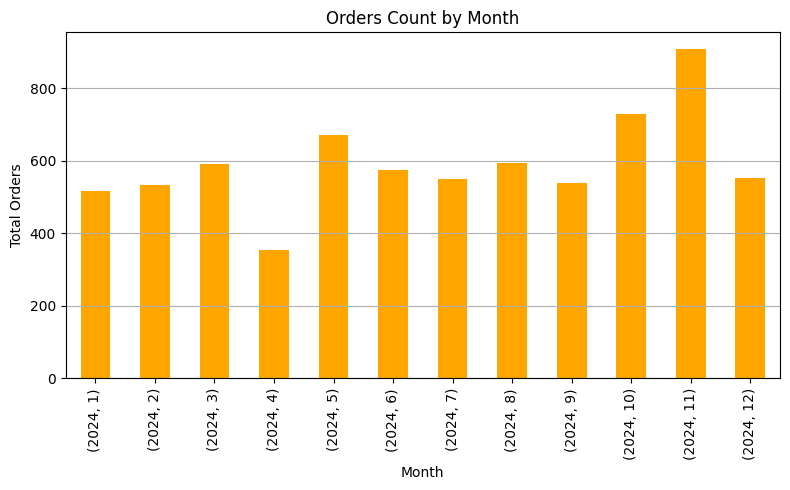

In [ ]:
# === Plot 3: Sales by Month ===
orders_agg_df['total_orders'].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Orders Count by Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('image\\Orders_Count_by_Month.png')
plt.show()

## Exercise
##### Find the Top 10 Best Selling Products based on the existing data and plot the Bar Chart.